In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns 
sns.set()

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix , roc_curve , precision_recall_curve
from sklearn.metrics import accuracy_score , roc_auc_score, auc , classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression


In [2]:
df = pd.read_csv("loan_sanction_train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


No of Dependents needs to be changed to float type

In [6]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [7]:
# Checking for duplicates
print("Number of duplicates: ",df.duplicated().sum())

# Checking for missing values
print("\nNumber of missing values:\n\n",df.isna().sum())

Number of duplicates:  0

Number of missing values:

 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
df[df['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [9]:
subset = df[(df['Married']=="No") & (df['Education']=="Graduate") & (df['CoapplicantIncome']==0) & (df['Loan_Amount_Term']==360) & (df['Credit_History']==1.0) ]
subset['Gender'].value_counts()

Male      40
Female    35
Name: Gender, dtype: int64

In [10]:
df[df['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [11]:
subset = df[(df['Gender']=="Male") & (df['Education']=="Graduate") & (df['Self_Employed']=="No") & (df['Credit_History']==1.0)]
subset['Married'].value_counts()

Yes    179
No      66
Name: Married, dtype: int64

In [12]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [13]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [14]:
df.select_dtypes('object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [15]:
# dropping Loan_Id as it is unique to every customer and has no information to provide
df.drop(columns = ['Loan_ID'],inplace = True)

# checking for cardinality
df.select_dtypes('number').nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
dtype: int64

"Loan_Amount_Term" and "Credit_History" have low cardinality and should be treated as categorical features rather than numerical ones.

In [16]:
print("Loan_Amount_Term Value counts:\n",df['Loan_Amount_Term'].value_counts())
print("\nCredit_History Value counts:\n",df['Credit_History'].value_counts())

Loan_Amount_Term Value counts:
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Credit_History Value counts:
 1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [17]:
# Converting Credit History to categorical variable
df['Credit_History'] = df['Credit_History'].map({1:'Yes',0:'No'})

In [18]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
print("Gender Value counts:\n",df['Gender'].value_counts())
print("\nDependents Value counts:\n",df['Dependents'].value_counts())
print("\nSelf_Employed:\n",df['Self_Employed'].value_counts())


Gender Value counts:
 Male      489
Female    112
Name: Gender, dtype: int64

Dependents Value counts:
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Self_Employed:
 No     500
Yes     82
Name: Self_Employed, dtype: int64


In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df.shape

(542, 12)

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,Yes,Urban,Y


# Exploratory data analysis

## Univariate EDA 

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

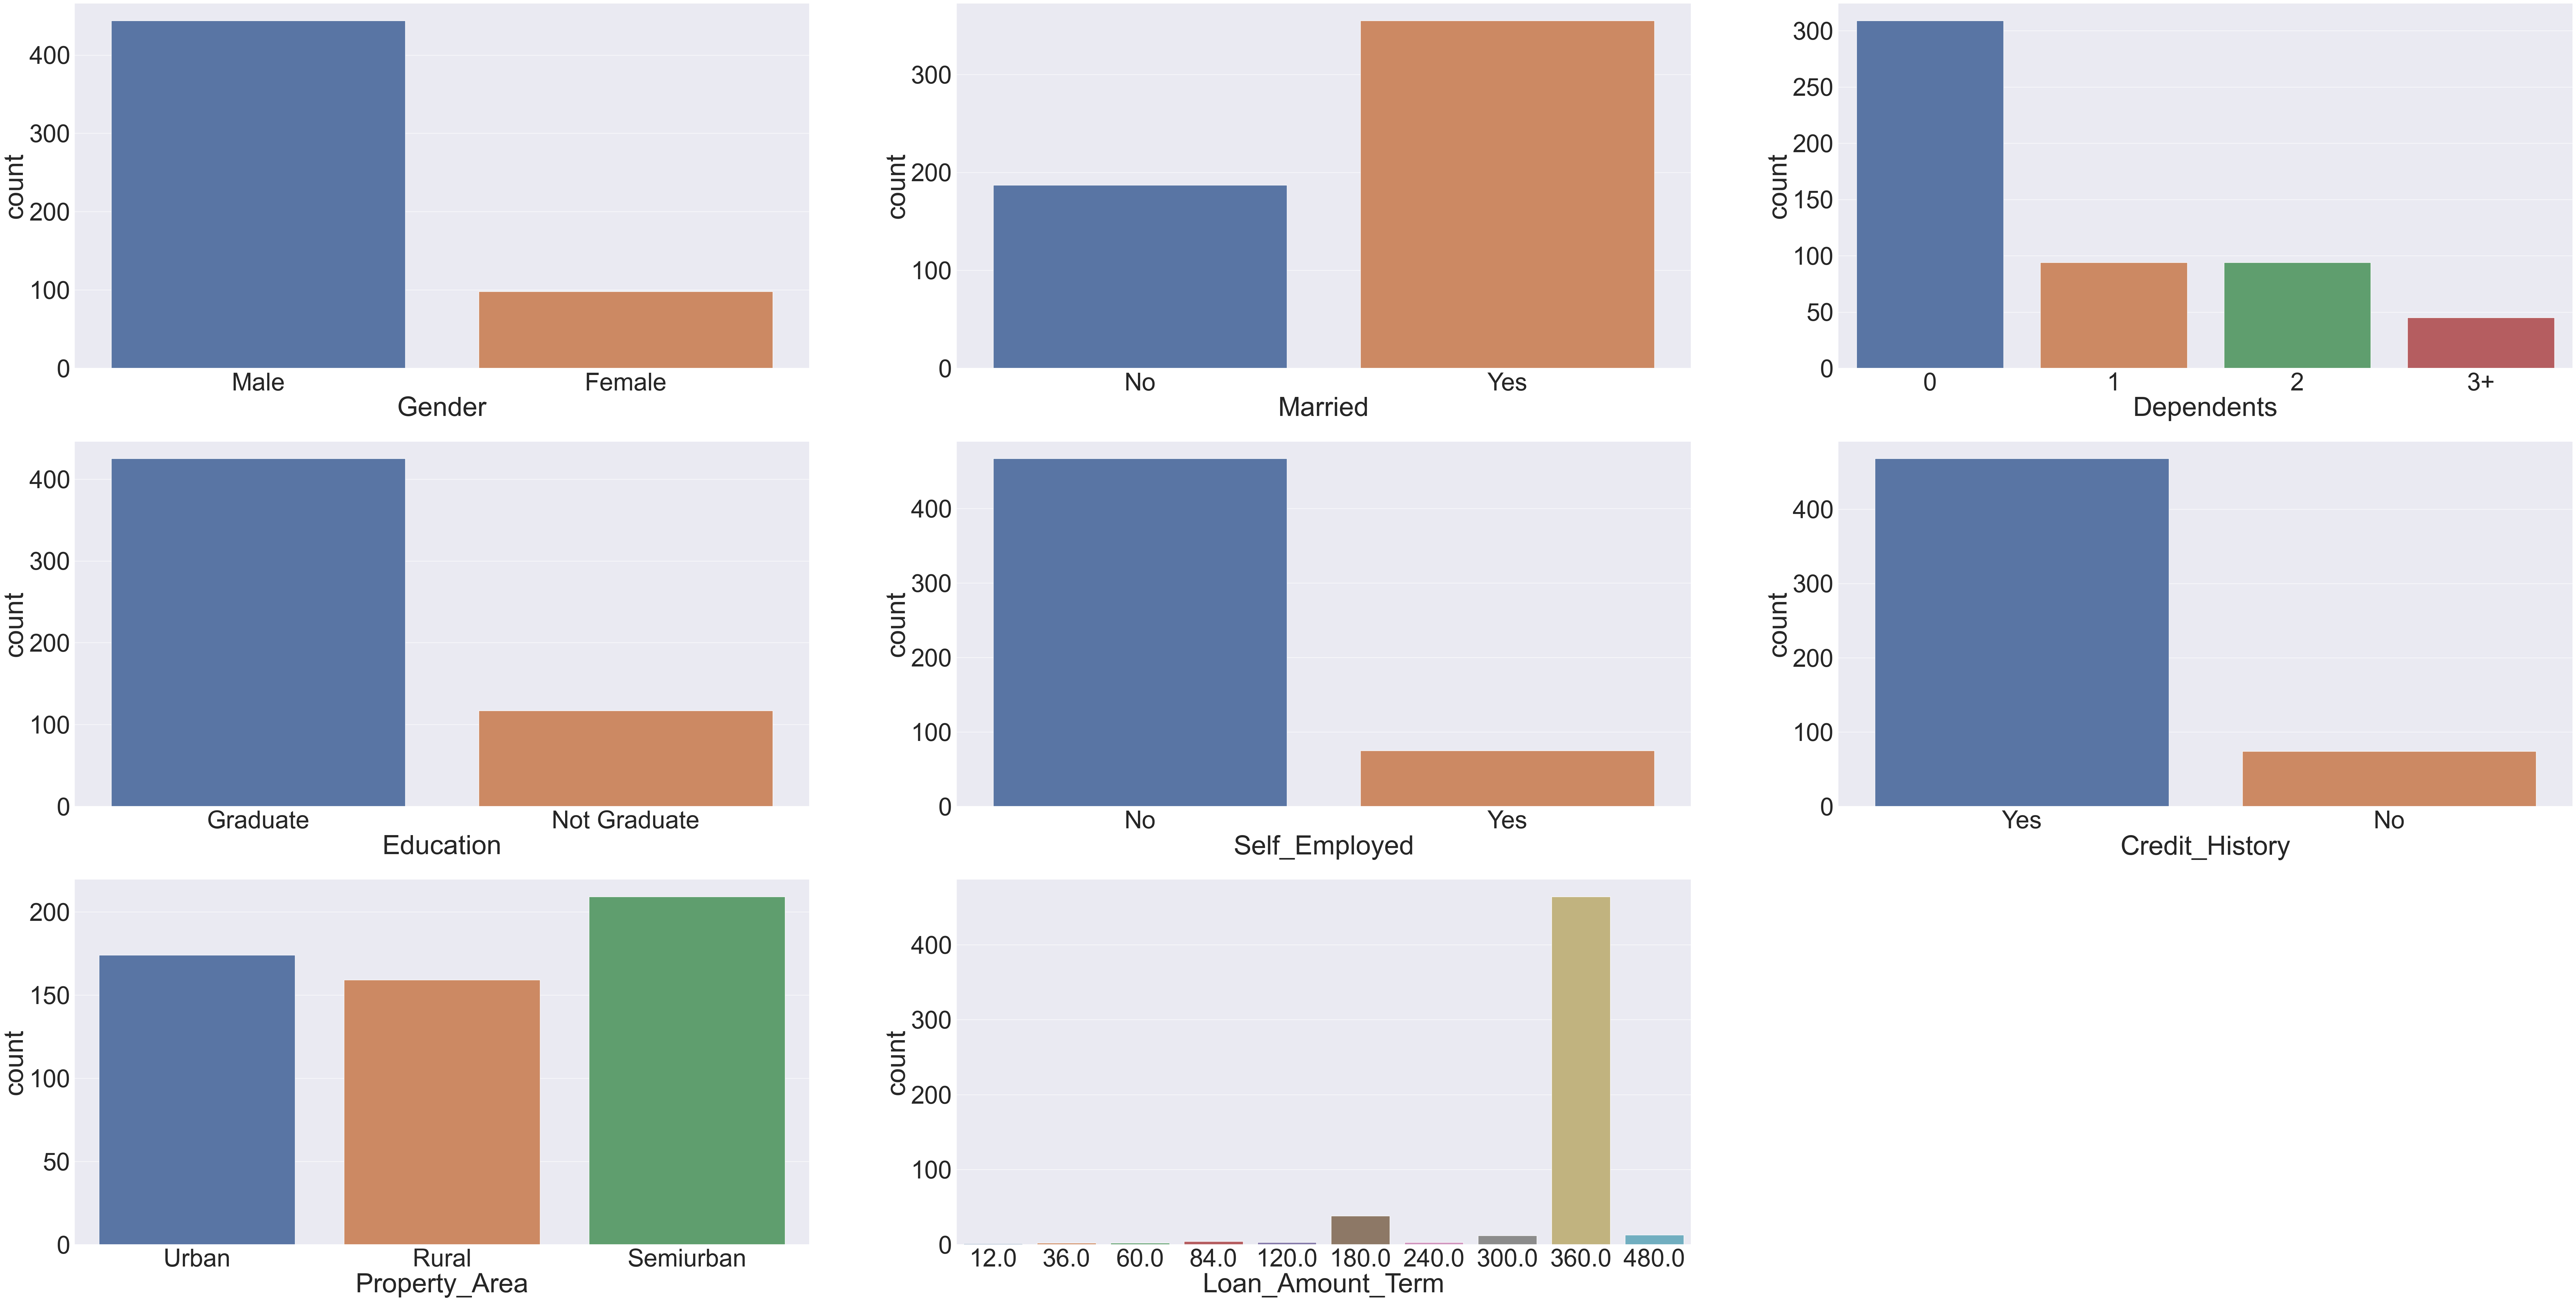

In [24]:
plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

 
plt.subplot(331)
sns.countplot(data=df, x=df['Gender'])

plt.subplot(332)
sns.countplot(data=df, x=df['Married'])

plt.subplot(333)
sns.countplot(data=df, x=df['Dependents'])

plt.subplot(334)
sns.countplot(data=df, x=df['Education'])

plt.subplot(335)
sns.countplot(data=df, x=df['Self_Employed'])

plt.subplot(336)
sns.countplot(data=df, x=df['Credit_History'])

plt.subplot(337)
sns.countplot(data=df, x=df['Property_Area'])

plt.subplot(338)
sns.countplot(data=df, x=df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Status', ylabel='count'>

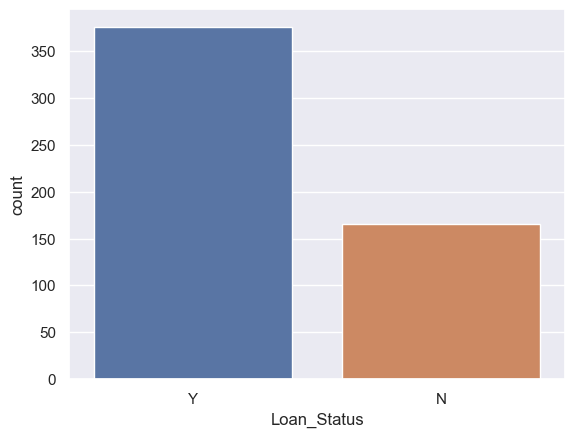

In [25]:
sns.set(font_scale = 1)

sns.countplot(data=df, x=df['Loan_Status'])

Most of the applicants are males.
Most of the applicants are married.
Most of the applicants have no dependents.
Most of the applicants are Graduates.
Most of the applicants aren't self employed.
Most of the loans are above 360.
Most of the applicants do have a credit history.

<Figure size 10000x5000 with 0 Axes>

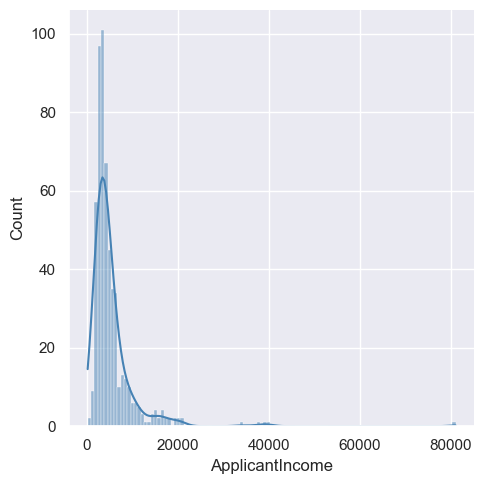

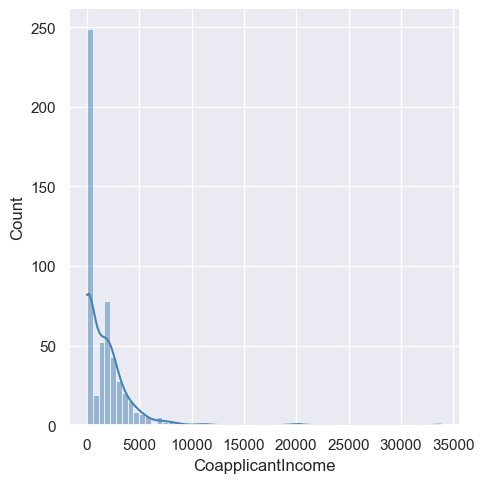

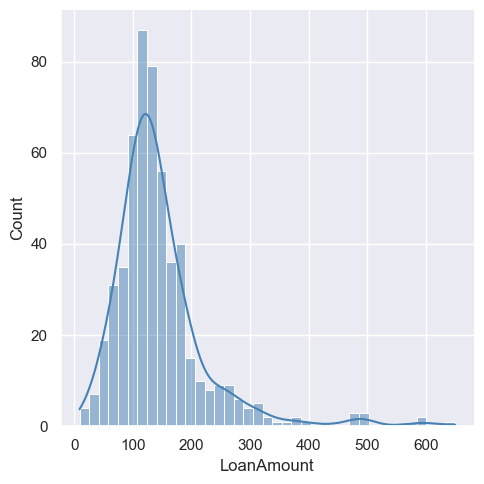

In [26]:
plt.figure(figsize=(100,50))
sns.set(font_scale = 1)

sns.displot(df['ApplicantIncome'], color= ('steelblue'), kde=True)
sns.displot(df['CoapplicantIncome'], color= ('steelblue'), kde=True)
sns.displot(df['LoanAmount'], color= ('steelblue'), kde=True)


In [27]:
df[df['CoapplicantIncome']<10000].shape

(537, 12)

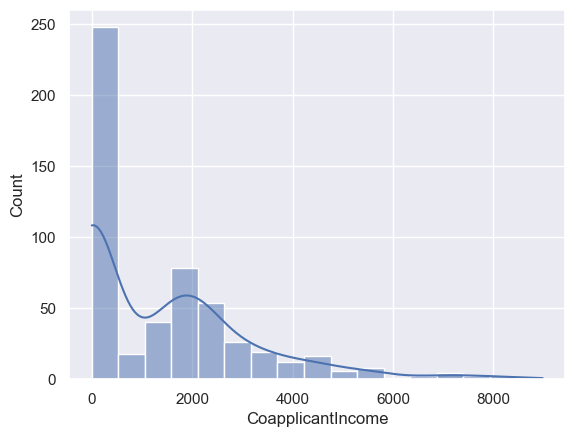

In [28]:
sns.histplot(df[df['CoapplicantIncome']<10000]['CoapplicantIncome'], kde=True);


In [29]:
df = df[df['CoapplicantIncome']<10000]

for col in ['LoanAmount','ApplicantIncome']:
    df[col] = df[col].apply(np.log1p)

We handle outliers by applying log transformation on LoanAmount and ApplicantIncome and handle them in CoapplicantIncome by setting a threshold.

<Figure size 10000x5000 with 0 Axes>

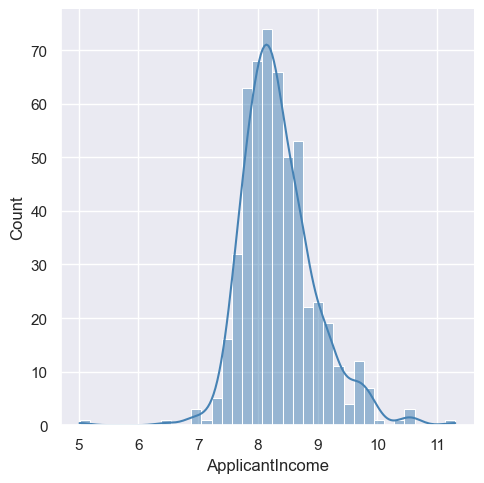

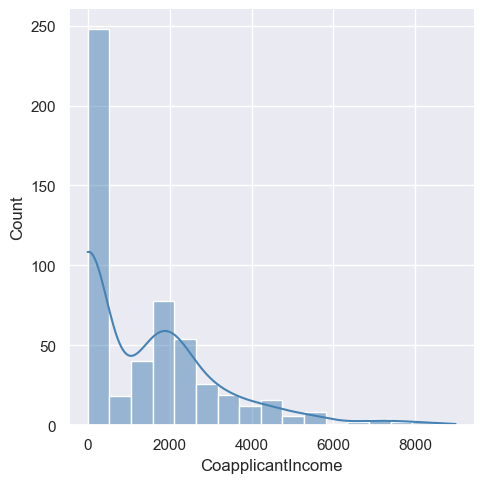

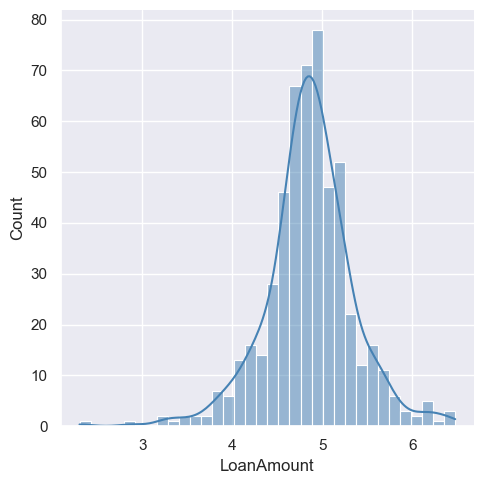

In [30]:
plt.figure(figsize=(100,50))
sns.set(font_scale = 1)

sns.displot(df['ApplicantIncome'], color= ('steelblue'), kde=True)
sns.displot(df['CoapplicantIncome'], color= ('steelblue'), kde=True)
sns.displot(df['LoanAmount'], color= ('steelblue'), kde=True)


## Bivariate EDA 

<Axes: xlabel='Property_Area', ylabel='count'>

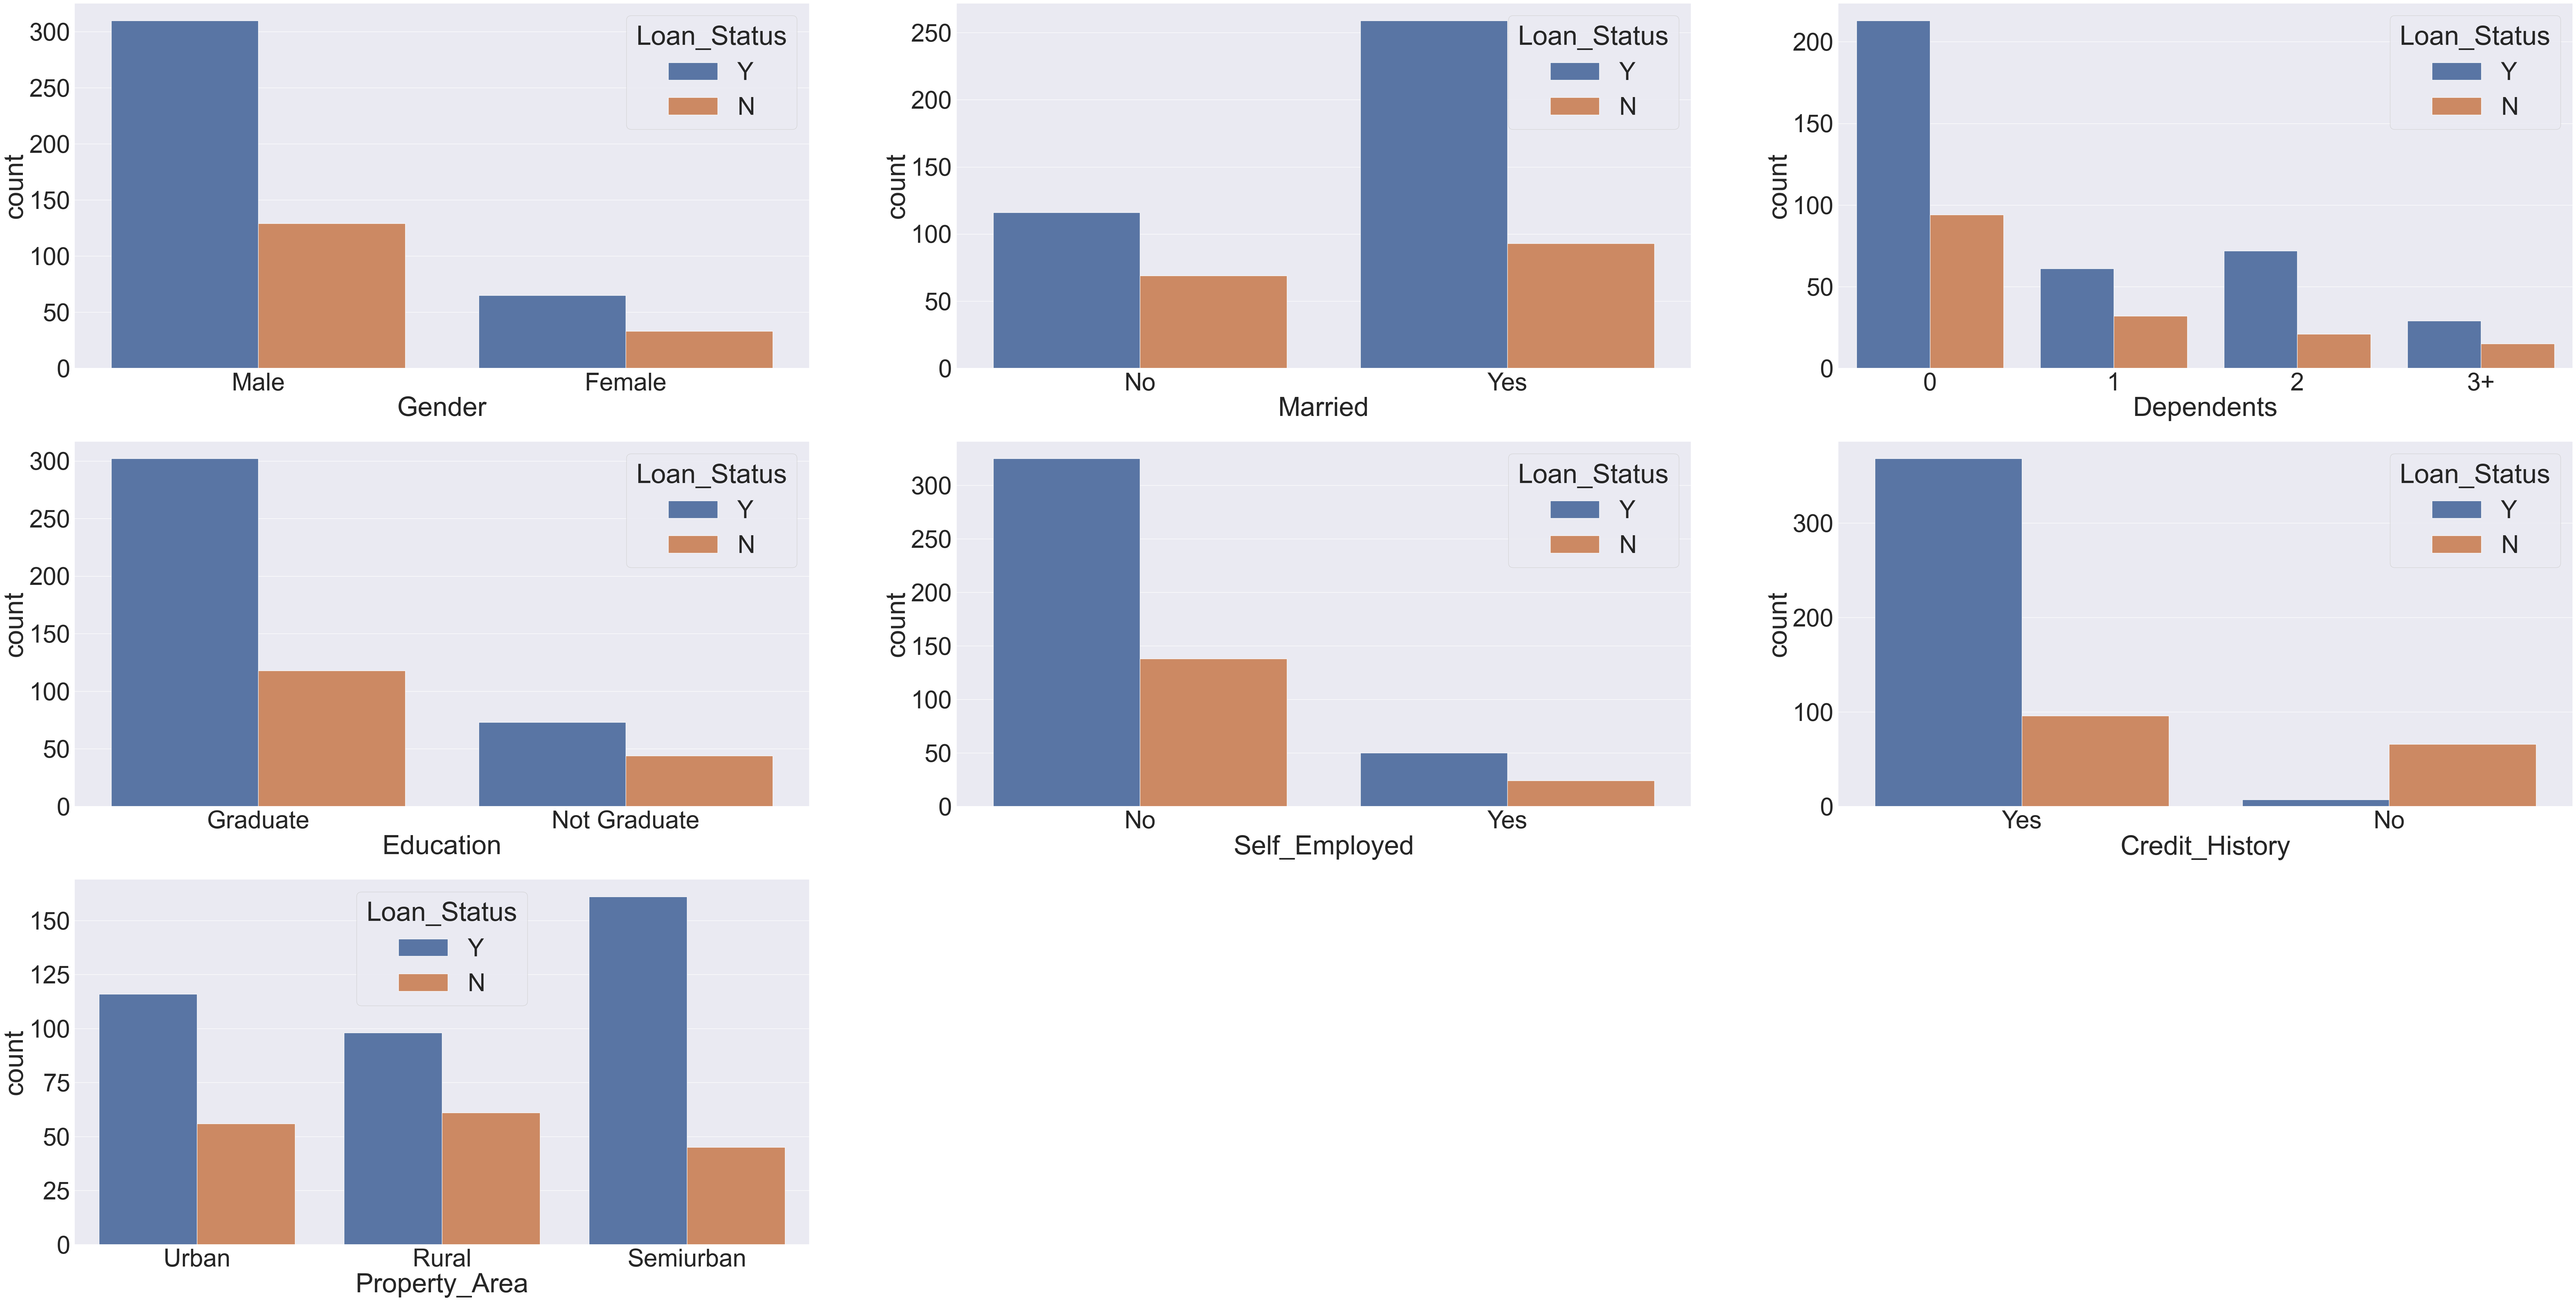

In [31]:
plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(data=df, x=df['Gender'], hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(data=df, x=df['Married'], hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(data=df, x=df['Dependents'], hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(data=df, x=df['Education'], hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(data=df, x=df['Self_Employed'], hue=df['Loan_Status'])

plt.subplot(336)
sns.countplot(data=df, x=df['Credit_History'], hue=df['Loan_Status'])

plt.subplot(337)
sns.countplot(data=df, x=df['Property_Area'], hue=df['Loan_Status'])


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

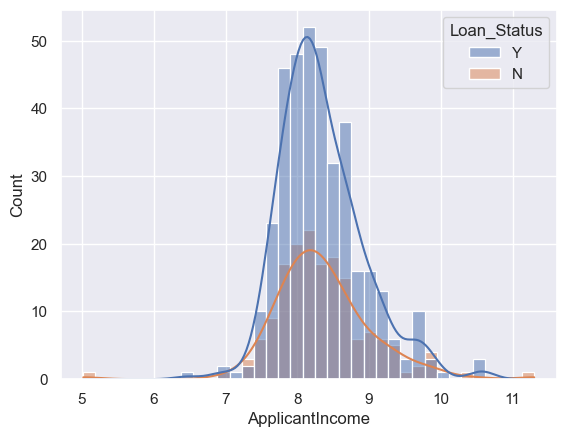

In [32]:
# plt.figure(figsize=(100,50))
sns.set(font_scale = 1)

sns.histplot(data = df,x= df['ApplicantIncome'],kde=True, hue=df["Loan_Status"])


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

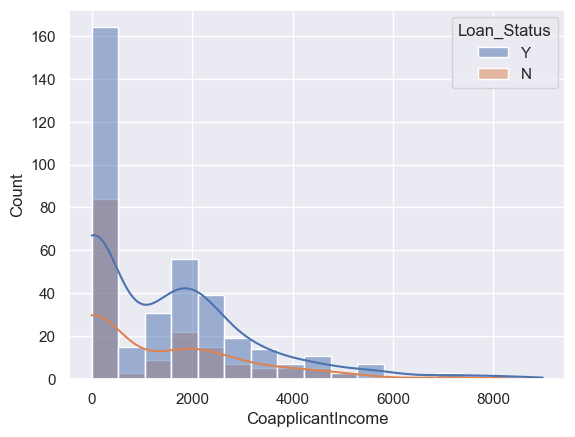

In [33]:
sns.histplot(data = df,x = df['CoapplicantIncome'],kde=True, hue=df["Loan_Status"])


<Axes: xlabel='LoanAmount', ylabel='Count'>

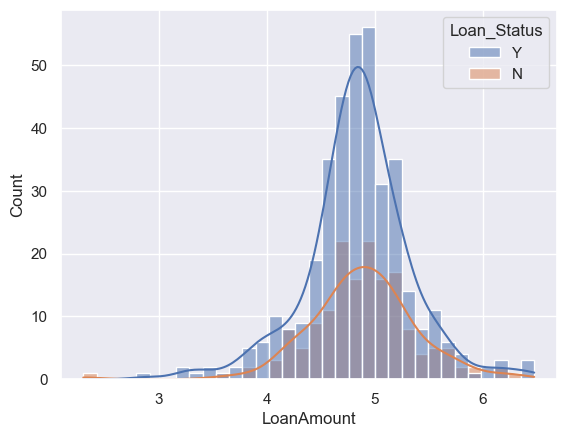

In [34]:
sns.histplot(data = df,x = df['LoanAmount'],kde=True, hue=df["Loan_Status"])

In [35]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
df['Loan_Status'].value_counts()

1    375
0    162
Name: Loan_Status, dtype: int64

C:\Users\bitha\AppData\Local\Temp\ipykernel_18656\3075300494.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues');


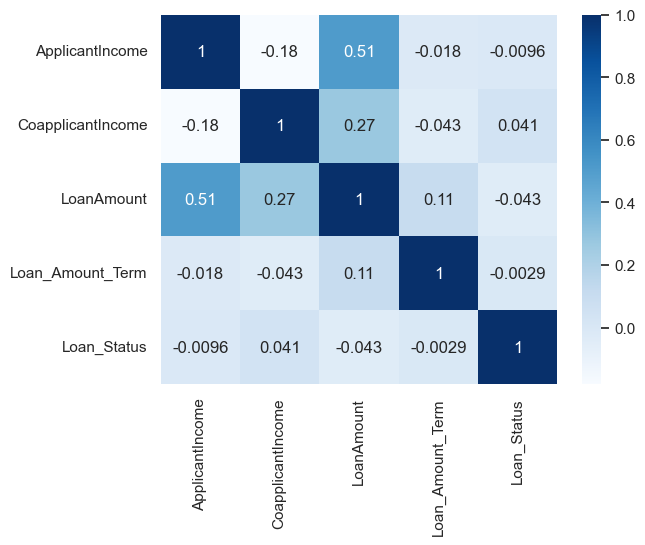

In [36]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');


## Encoding categorical variables 

In [37]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Gender'].value_counts()


1    439
0     98
Name: Gender, dtype: int64

In [38]:
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Married'].value_counts()

1    352
0    185
Name: Married, dtype: int64

In [39]:
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
df['Dependents'].value_counts()

0    307
1     93
2     93
3     44
Name: Dependents, dtype: int64

In [40]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    420
0    117
Name: Education, dtype: int64

In [41]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    463
1     74
Name: Self_Employed, dtype: int64

In [42]:
df['Property_Area'] = df['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Property_Area'].value_counts()

1    206
2    172
0    159
Name: Property_Area, dtype: int64

In [43]:
df['Loan_Amount_Term'].value_counts()

360.0    459
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [44]:
df['Credit_History'] = df['Credit_History'].map({'Yes':1,'No':0})
df['Credit_History'].value_counts()

1    464
0     73
Name: Credit_History, dtype: int64

In [45]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674197,0.0,4.993232,360.0,1,2,1
1,1,1,1,1,0,8.430327,1508.0,4.859812,360.0,1,0,0
2,1,1,0,1,1,8.006701,0.0,4.204693,360.0,1,2,1
3,1,1,0,0,0,7.857094,2358.0,4.795791,360.0,1,2,1
4,1,0,0,1,0,8.699681,0.0,4.955827,360.0,1,2,1


In [46]:
df.shape

(537, 12)

In [47]:
X = df.drop(columns = 'Loan_Status', axis=1)
Y = df['Loan_Status']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [49]:
# # VARIANCE INFLATION FACTOR
# p = X_train.shape[1]
# print(p)

# vif = [variance_inflation_factor(X_train.values, i) for i in range(p)]
# vif = pd.Series(vif, index = X_train.columns)
# print(vif)

# Fitting Logistic Regression Model 

In [50]:
logr = LogisticRegression()
model = logr.fit(X_train, Y_train)

model.coef_



array([[ 4.91235430e-02,  5.30374231e-01,  5.60018550e-02,
         6.10150550e-01, -1.03946189e-01,  8.00007503e-02,
         7.53882846e-05, -4.55432507e-01, -3.16230122e-03,
         2.93281431e+00,  9.83962168e-02]])

In [51]:
Y_train_pred = model.predict(X_train)
Y_train_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
Y_test_pred = model.predict(X_test)
Y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

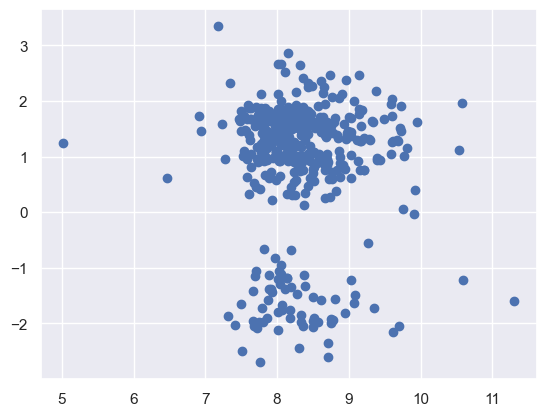

In [53]:
# Predict probabilities on the train set
Y_probs_train = model.predict_proba(X_train)[:, 1]


# Predict probabilities on the test set
Y_probs = model.predict_proba(X_test)[:, 1]

plt.scatter(X_train['ApplicantIncome'], np.log(Y_probs_train/(1-Y_probs_train)))

In [54]:
accuracy_score(Y_train, Y_train_pred)

0.8088578088578089

In [55]:
accuracy_score(Y_test, Y_test_pred)

0.7962962962962963

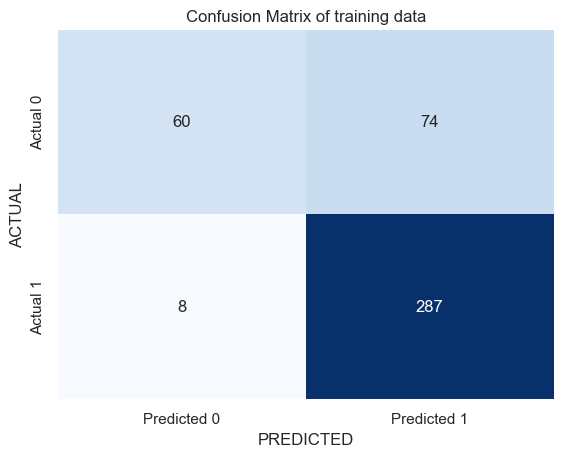

In [56]:
cm_train = confusion_matrix(Y_train, Y_train_pred)

sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, 
           xticklabels=["Predicted 0", "Predicted 1"],
           yticklabels= ["Actual 0", "Actual 1"])

plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title("Confusion Matrix of training data")
plt.show()

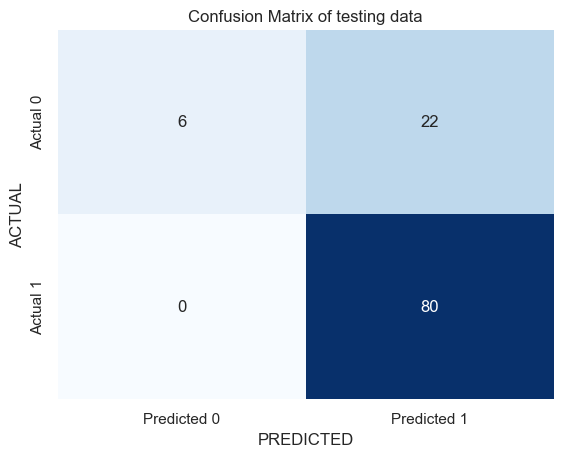

In [57]:
cm_test = confusion_matrix(Y_test, Y_test_pred)

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, 
           xticklabels=["Predicted 0", "Predicted 1"],
           yticklabels= ["Actual 0", "Actual 1"])

plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title("Confusion Matrix of testing data")
plt.show()

In [1]:
TP = 80
TN = 6
FP = 22
FN = 0

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = TP+TN / (TP + TN + FP + FN)
precision = TP / (TP + FP)
f1_score = (2*precision*sensitivity)/(precision + sensitivity)

print("Sensitivity = ", sensitivity)
print("Specificity = ", specificity)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("F-1 Score = ", f1_score)

Sensitivity =  1.0
Specificity =  0.21428571428571427
Accuracy =  80.05555555555556
Precision =  0.7843137254901961
F-1 Score =  0.8791208791208792


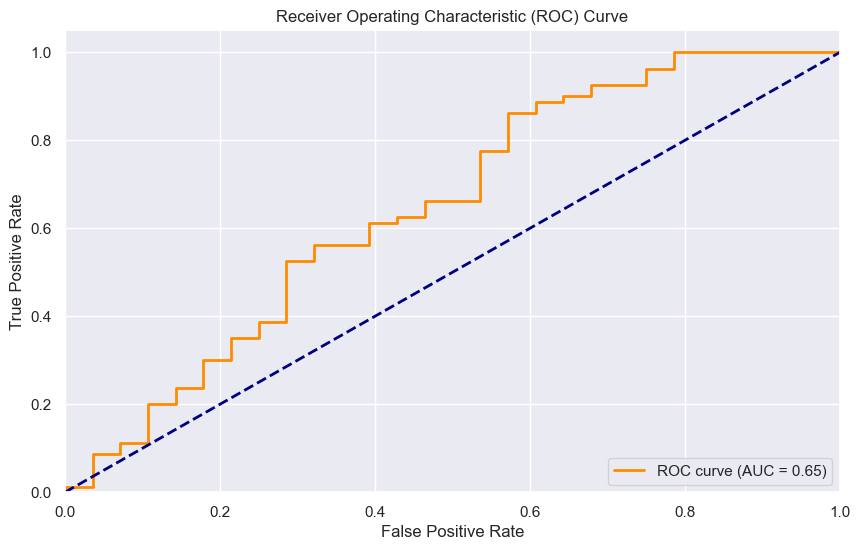

In [69]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# In this code:

# We generate some synthetic data using make_classification, but you should replace this with your actual data.
# We split the data into training and testing sets.
# We train a logistic regression model on the training data.
# We use the predict_proba method to obtain class probabilities for the test set.
# We compute the ROC curve using the roc_curve function.
# We calculate the AUC (Area Under the Curve) using the auc function.
# Finally, we plot the ROC curve using Matplotlib.
# This code will display a ROC curve for your logistic regression model along with the AUC value in the plot's legend.







In [70]:
# Initialize variables to store the best threshold and best accuracy
best_threshold = 0
best_accuracy = 0

# Iterate through threshold values and find the best one
for threshold in thresholds:
    Y_pred = (Y_probs >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, Y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Accuracy: {best_accuracy:.2f}")

Best Threshold: 0.59
Best Accuracy: 0.80


In [61]:
# def loan_amount(x):
#     if pd.notna(x):
#         if int(x)>=360:
#             return '>=360'
#         elif int(x)<360:
#             return '<360'
#     else:
#         return x
    
# # for it's low cardinality we will treat Loan_amount_term as categorical feature, we will also try to handle the imbalance of the classes
# df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(loan_amount)

# # mapping target values for the sake of visualization in bivariate analysis
# df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

# # Converting Credit History to categorical variable
# df['Credit_History'] = df['Credit_History'].map({1:'Yes',0:'No'})

In [62]:
# df.drop('Loan_Status',axis=1).describe()

ApplicantIncome and CoapplicantIncome have extreme outliers.
CoapplicantIncome column has a lot of zeros.

In [63]:
# df.describe(include='object')

In [64]:
# feat_cat = df.drop('Loan_Status',axis=1).select_dtypes(include = object).columns
# feat_num = df.drop('Loan_Status',axis=1).select_dtypes(exclude = object).columns
# feat_cat, feat_num

In [65]:
# num_data = df[feat_num]
# cat_data = df[feat_cat]

In [66]:
# num_data.head()